<a href="https://colab.research.google.com/github/Harshpatel44/ML-A2/blob/master/A2-dynamic%20backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1><center>Assignment 2</h1></center></b>

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from numpy.random import default_rng
rng = default_rng()

<center><h2><b>Part 1</h2></b></center>
<h3>(a) Creating the data set </h3>
<h3>(b) Adding noise function </h3>

below we create dataset 1 ( 2 clusters )

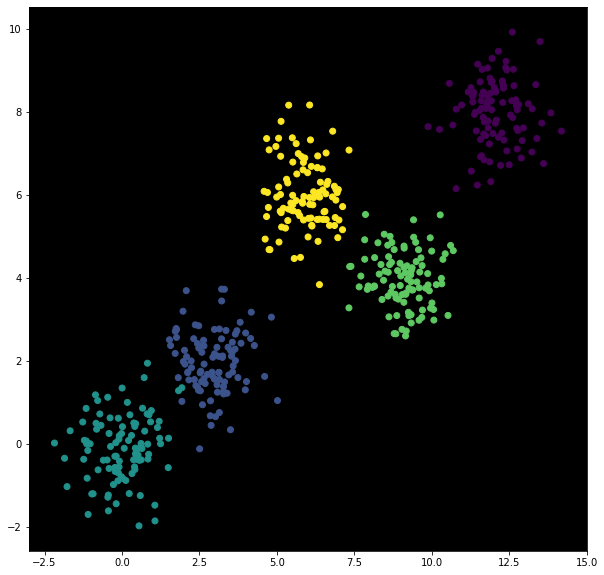

In [0]:
class data_set1:
  def __init__(self):
    self.cov1= [[0.4,0],[0,0.4]]      #covariance for class1
    self.cov2=[[0.4,0.0],[0.0,0.4]]   #covariance for class2    
    self.n=2             #mean for class2
  # method to adjust noise
  def noise(self,amt1,amt2=0):             
    n1=(3.5 - 0.4)*(amt1/100) + 0.4  #3.5 is max covariance and 0.4 is min covariance taken for noise
    self.cov1=[[n1,0],[0,n1]]
    if(amt2==0):
      amt2=amt1
    n2=(3.5 - 0.4)*(amt2/100) + 0.4
    self.cov2=[[n2,0],[0,n2]]
  #method to create data
  def create(self,n=2,items=100,noise=0):
    #class_label=1/n
    self.noise(noise,noise)
    self.n=n
    self.items=items
    mx = rng.choice(int(self.n), size=self.n, replace=False)  # random x value of mean 
    my = rng.choice(int(self.n), size=self.n, replace=False)  # random y value of mean
    for i in range(self.n):
        if(i==0):
          x1, y1 = np.random.multivariate_normal([mx[i]*3,my[i]*2], self.cov1, items).T  #class1
          self.d1_data = np.array([x1,y1,np.zeros(x1.shape)+i])
          #self.d1_data = np.array([x1,y1,np.zeros(x1.shape)+(i*class_label)])
        else:
          x2, y2 = np.random.multivariate_normal([mx[i]*3,my[i]*2], self.cov2, items).T  #class2
          self.d1_data=np.append(self.d1_data,[x2,y2,np.zeros(x1.shape)+i],axis=1)
          #self.d1_data=np.append(self.d1_data,[x2,y2,np.zeros(x1.shape)+(i*class_label)],axis=1)
    #appending both classes to 1 array and also adding another column of labels
    self.d1_data=self.d1_data.T
    return self.d1_data
  def plot(self):
    plt.figure(figsize=(10,10))
    plt.scatter(self.d1_data[:,0],self.d1_data[:,1],c=self.d1_data[:,2])
    ax = plt.gca()
    ax.set_facecolor('xkcd:salmon')
    ax.set_facecolor((0, 0, 0))
    #plt.axis([-6,6,-6,6])
    plt.show()

obj1=data_set1()
X=obj1.create(5,100,5)
np.random.shuffle(X)
obj1.plot()

Now we create dataset 2 ( concetric circles dataset)

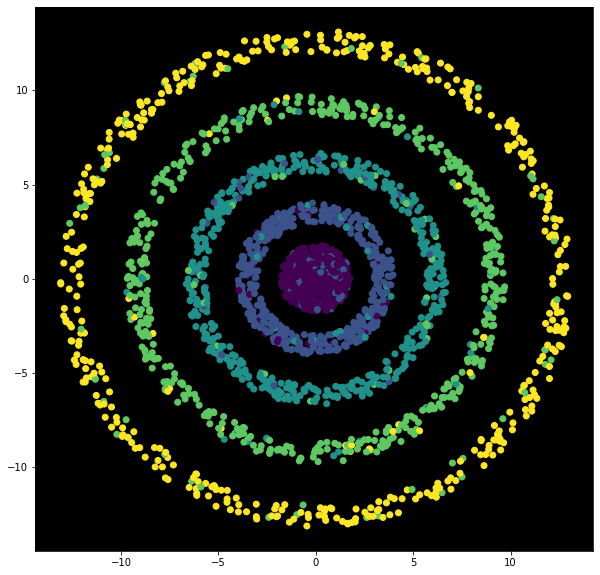

In [0]:
class data_set2:
  def circle_generation(self,items=130,n=50):
      r_factor=1
      self.n =n
      self.items = items
      for i in range(n):
          r_factor+=1
          if i ==0:
              #circle inner most
              a=np.random.random(self.items) * 2 * np.pi
              r = r_factor * np.sqrt(0.8*np.random.random(self.items)+i)
              self.x1 = r * np.cos(a)
              self.y1 = r * np.sin(a)
              self.d2_data=np.array([self.x1,self.y1,np.zeros(self.x1.shape)+i])
          else:
              #outer circles
              a=np.random.random(self.items) * 2 * np.pi
              r = r_factor * (np.sqrt(0.8*np.random.random(self.items)+i))
              self.x2 = r * np.cos(a) 
              self.y2 = r * np.sin(a)
              #creating an array with both classes and with labels
              self.d2_data=np.append(self.d2_data,[self.x2,self.y2,np.zeros(self.x1.shape)+i],axis=1)
      self.d2_data=self.d2_data.T
      return self.d2_data
  #to adjust noise of the dataset
  def noise(self,noise):
    amt= int( np.round( self.items*( noise/100) ) )
    for i in range(self.n):
        if (i==0):
            arr = rng.choice(self.items, size=amt, replace=False)
            self.d2_data[arr,2]=i+1
        elif( i == self.n-1):
            arr = rng.choice(self.items, size=amt, replace=False) + i * self.items
            self.d2_data[arr,2]=i-1
        else: 
            arr1 = rng.choice(int(self.items/2), size=int(amt/2), replace=False) + (i * self.items)
            arr2 = rng.choice(int(self.items/2), size=int(amt/2), replace=False) + (int(i * self.items + self.items/2))
            self.d2_data[arr1,2]=i+1
            self.d2_data[arr2,2]=i-1
    return self.d2_data
  def plot(self):
    figure(figsize=(10,10))
    plt.scatter(self.d2_data[:,0],self.d2_data[:,1],c=self.d2_data[:,2])
    ax = plt.gca()
    ax.set_facecolor('xkcd:salmon')
    ax.set_facecolor((0, 0, 0))
    plt.savefig('cluster.png')
    plt.show()
obj2=data_set2()
obj2.circle_generation(500,5)   # 5 and 3 is the radius of the outer and inner circle
X= obj2.noise(10)
np.random.shuffle(X)
obj2.plot()

Finally we create 'generateData' function with parameters specified in the assignment to generate data from 2 datasets

In [0]:
def generateData(numExamples,distributionShape,noise,classes=2,plotting='false'):
    if(distributionShape=='twoClusters'):
      obj1=data_set1()
      X=obj1.create(classes,numExamples,noise)
      np.random.shuffle(X)
      if(plotting=='true'):
          obj1.plot()
      return X
    if(distributionShape=='circles'):
      obj2=data_set2()
      obj2.circle_generation(numExamples,classes)
      X= obj2.noise(noise)
      np.random.shuffle(X)
      if(plotting=='true'):
          obj2.plot()
      return X

Plotting both datasets for noise = 0

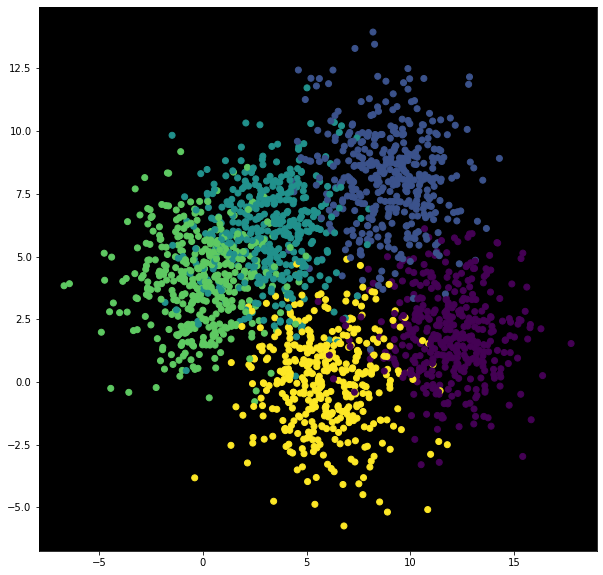

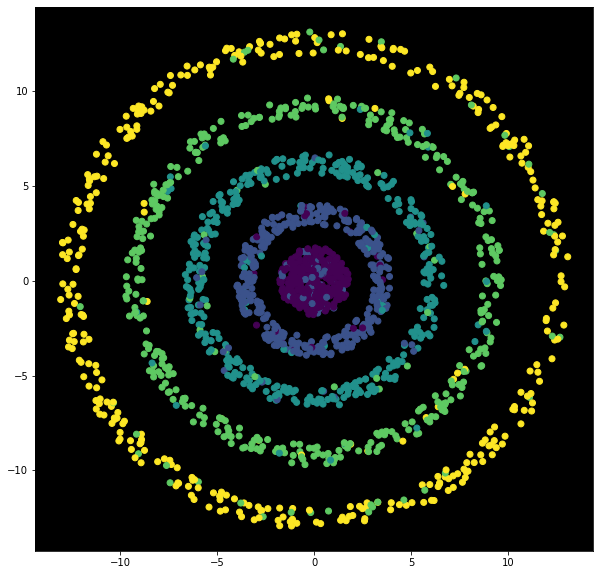

In [0]:
X=generateData(400,'twoClusters',100,5,'true')
X=generateData(400,'circles',10,5,'true')

1. Dataset_1 is generated as plotted above ( with noise = 0 % ). Noise can be increased by changing the covariance.
2. Covariance for which noise = 0 % (plotted above) is [ [ 0.4,0 ] , [ 0,0.4 ] ] for both classes.
3. As increasing value in covariance increases noise, range of noise taken is from 0.4 to 3.5 .

Plotting for range of noises [1,10,50,100] for 5 classes



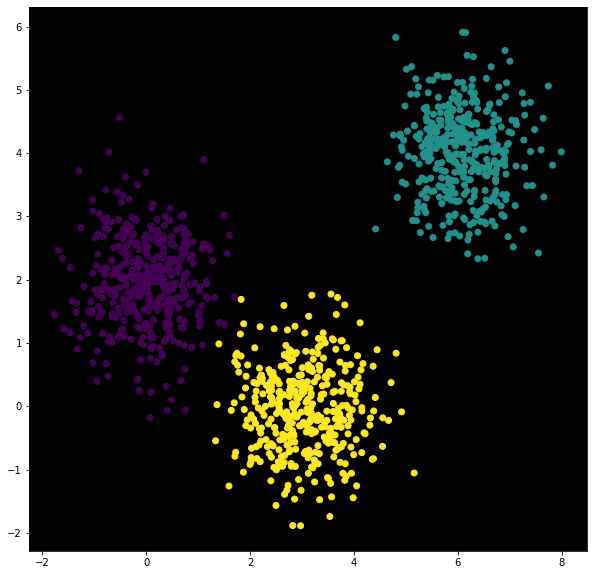

Dataset: twoClusters   Noise: 1


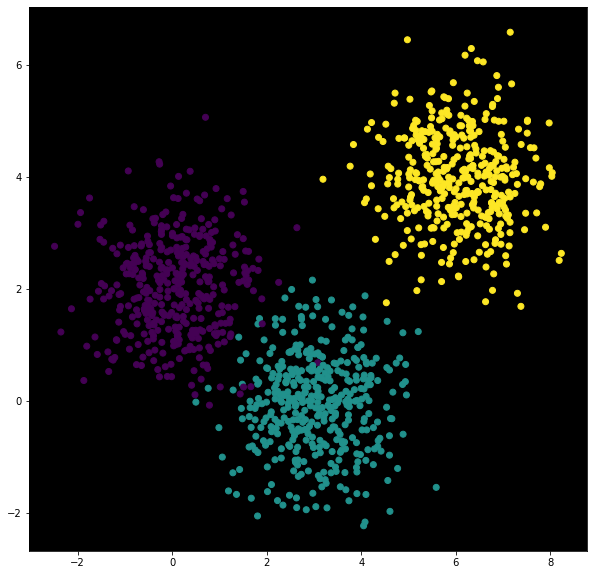

Dataset: twoClusters   Noise: 10


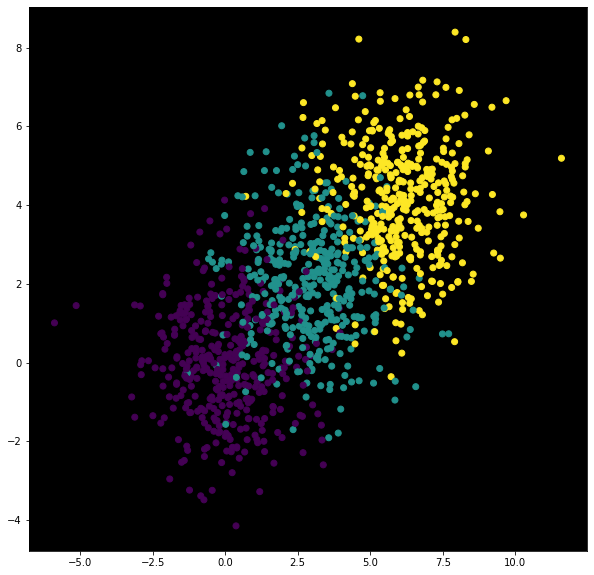

Dataset: twoClusters   Noise: 50


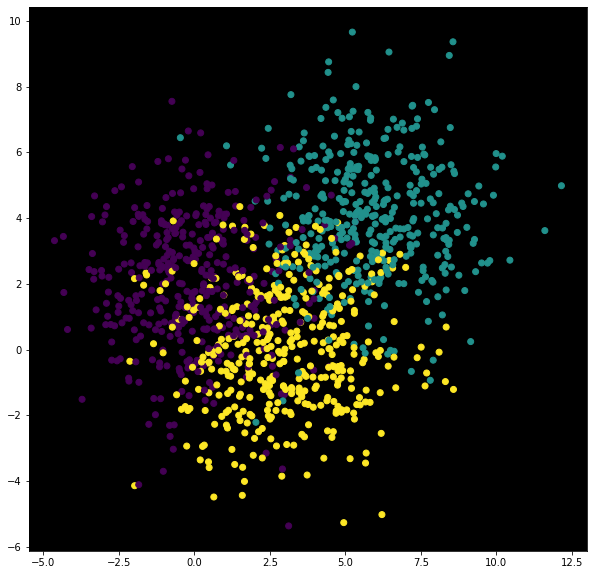

Dataset: twoClusters   Noise: 100


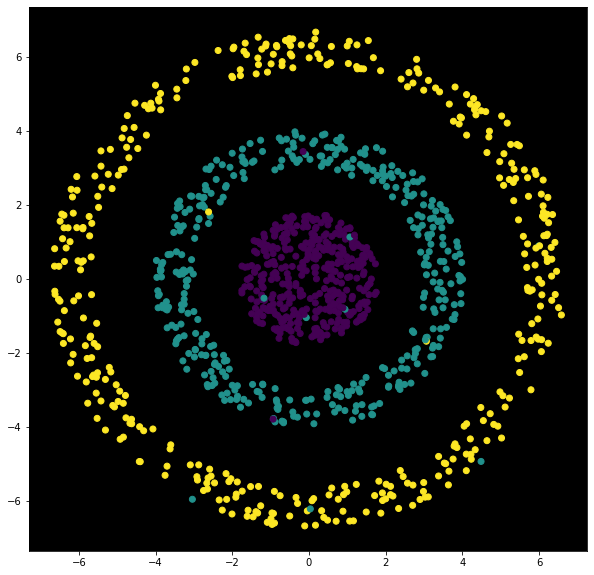

Dataset: circles   Noise: 1


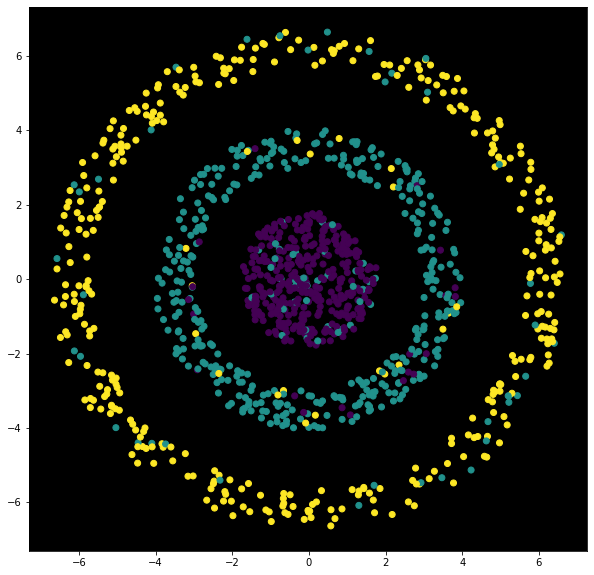

Dataset: circles   Noise: 10


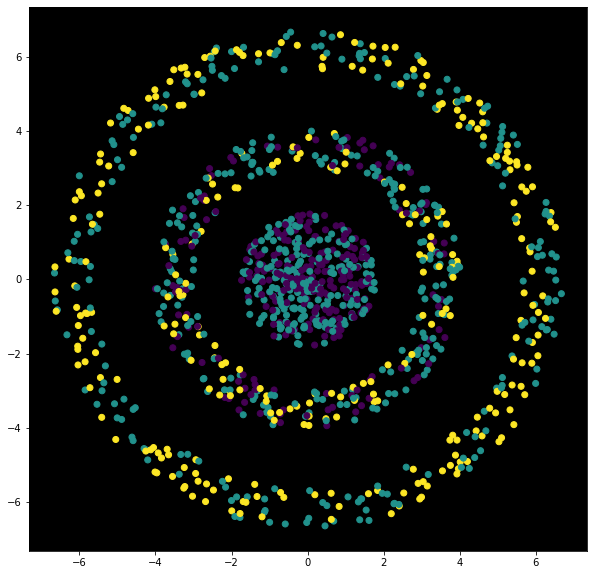

Dataset: circles   Noise: 50


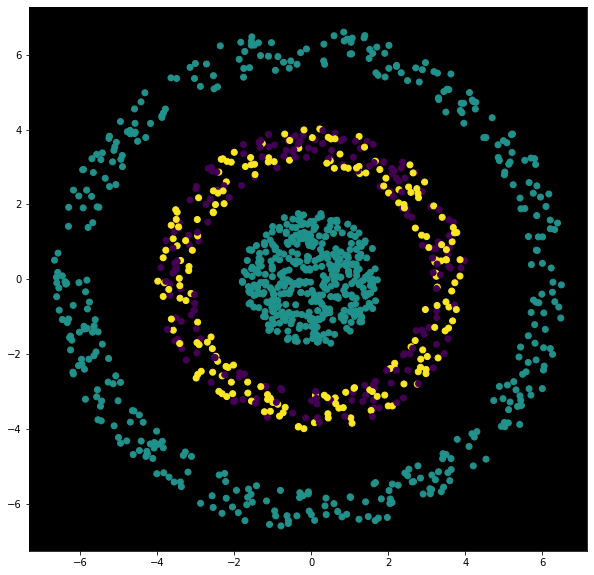

Dataset: circles   Noise: 100


In [0]:

for i in [1,10,50,100]:
  X=generateData(400,'twoClusters',i,3,'true')
  print('Dataset: twoClusters   Noise:',i)

for i in [1,10,50,100]:
  X=generateData(400,'circles',i,3,'true')
  print('Dataset: circles   Noise:',i)

Below is a code for one hot encoding

In [0]:
def one_hot_encoding(X,classes):
  one_hot_X=np.zeros((X.shape[0],classes))
  one_hot_X[range(X.shape[0]),np.array(X[:,-1],dtype='int8')] = 1
  X=np.array(X[:,:-1])
  X=np.append(X,one_hot_X,axis=1)
  return X
#X=generateData(10,'circles',0,5,'false')
#X=one_hot_encoding(X,5)

Below is a code for plotting decision boundaries

In [0]:
def plot_decision(X,w1,w2,hidden,output,activation):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    ar=np.array([xx.ravel(), yy.ravel()])   
    for i in range(output+1):   # adding column for bias and label for consistency
      ar=np.append(ar,np.zeros((1,ar.shape[1]))+1,axis=0)
    z = net_obj.predict( ar.T,w1,w2,X.shape[1],hidden,output,activation,1)
    z = z[:,0].reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(X[:,0],X[:,1],c=X[:,-1])
    plt.show()

Below is a code for train test split

In [0]:
def train_test_split(data,tr_percent,te_percent):
    n=np.round((data.shape[0] * tr_percent) / 100)
    return data[0:int(n),:],data[int(n):,:]

#train,test=train_test_split(X,60,40)


<h3> (c) Training a feedforward neural network </h3>

In [0]:
class neural_net:
  def __init__(self,learning_rate=0.01):
      self.learning_rate=0.01
  def active_func(self,method,z):  #checked
    if method=='relu':
      return np.maximum(0,z)
    if method =="leaky relu":
        return np.maximum(0.01*z,z)  #leaky relu
    if method=='sigmoid':
      return 1/(1+np.exp(-z))
    if method=="tanh":
      return 1
    if method=="softmax":
        return np.exp(z-np.maximum(z))/np.sum(np.exp(z-np.maximum(z)),axis=0)
    #if method=="linear":
    #    np.eye(z.size[0])
  def cross_entropy(self,t,y):
    temp=t* np.log(y+0.00001) + (1-t) * np.log(1 - y +0.00001)     #0.00001 is added so that log does not give nan or inf
    temp=np.around(temp,decimals=3)
    return temp 
  def deriv_activ_fn(self,method,h,t=0):
        if method=='sigmoid':
          return (h * (1 - h))
        if method=="relu":
          return np.where(h>0,1,0)
          #return np.maximum(0,h)
        if method =="leaky relu":
          return np.maximum(0.01*h,h) 
        if method=="tanh":
          return 1
        if method=="softmax":
          return h * (1 - h)
          # temp=h.reshape((-1,1))
          # jacobian_matrix=np.diagflat(h) - np.dot(temp,temp.T)
          # jacobian_matrix=np.sum(jacobian_matrix,axis=1,keepdims=1)
          # deriv=jacobian_matrix.reshape((h.shape[0],h.shape[1]))
          #print(deriv)
          return deriv 
  def check_activation(self,numOutputs):
      if(numOutputs == 1):
        last_activation = "sigmoid"
      if(numOutputs > 1):
        last_activation = "softmax"
      return last_activation
  def train(self,x,numInput,numHiddenUnits,numOutputs,activationType,numIter):
      last_activation=self.check_activation(numOutputs)
      b1=np.random.rand(2)
      b2=np.random.rand(1)  
      np.random.seed(0)   #seed = 0, for practise
      w1=np.random.rand(numInput,numHiddenUnits)
      w2=np.random.rand(numHiddenUnits,numOutputs) 
      entropy=0
      for i in range(0,numIter):
          z1=np.dot(x[:,:-numOutputs],w1) 
          h1=self.active_func(activationType,z1) 
          z2=np.dot(h1,w2)
          y=self.active_func(last_activation,z2)
          t = (x[:,-numOutputs:]).reshape(x.shape[0],numOutputs)
          #loss= 0.5 * np.power((t-y),2)
          loss = t-y
          if(i%5000==0):
            print('***** ',loss,' ****')
          d=self.deriv_activ_fn(last_activation,y)
          y_ = np.multiply(loss,d)
          w2_=np.dot(h1.T,y_)
          h_=np.dot(y_,w2.T)
          z_=np.multiply(h_,self.deriv_activ_fn(activationType,h1))
          w1_ = np.dot(x[:,:-numOutputs].T,z_)
          w2 = w2 + self.learning_rate*w2_
          w1 = w1 + self.learning_rate*w1_
      return w1,w2
  def predict(self,x,w1,w2,numInput,numHiddenUnits,numOutputs,activationType,verbosity):      
    last_activation=self.check_activation(numOutputs)
    z1=np.dot(x[:,:-numOutputs],w1)
    h1=self.active_func(activationType,z1) 
    z2=np.dot(h1,w2)
    y=self.active_func(last_activation,z2)
    #y=np.around(y,decimals=1)
    y=np.where(y>0.5,1.,0.)
    cr_entropy=self.cross_entropy(x[:,-numOutputs:],y)
    #print(x[:,-numOutputs:])
    ret_array= np.append(y,cr_entropy,axis=1)
    # ret_array[:,0]=np.round(ret_array[:,0])
    return ret_array
  def accuracy(self,y,t):                        #finding accuracy of the model 
    acc = (np.count_nonzero((y-t)==0)) / y.shape[0]
    return acc

In [0]:
class neural_net2:
  def __init__(self,learning_rate=0.01):
      self.learning_rate=0.01
      
  def active_func(self,method,z):  #checked
    if method=='relu':
      return np.maximum(0,z)
    if method =="leaky relu":
        return np.maximum(0.01*z,z)  #leaky relu
    if method=='sigmoid':
      return 1/(1+np.exp(-z))
    if method=="tanh":
      return 1
    if method=="softmax":
        print('z_shape:',z.shape)
        return np.exp(z)/np.sum(np.exp(z),axis=1,keepdims=True)
    #if method=="linear":
    #    np.eye(z.size[0])
  def cross_entropy(self,t,y):
    temp=-(t* np.log(y+0.00001) + (1-t) * np.log(1 - y +0.00001))     #0.00001 is added so that log does not give nan or inf
    temp=np.around(temp,decimals=3)
    return temp 
  def deriv_activ_fn(self,method,h,t=0):
        if method=='sigmoid':
          return (h * (1 - h))
        if method=="relu":
          return np.where(h>0,1,0)
          #return np.maximum(0,h)
        if method =="leaky relu":
          return np.maximum(0.01*h,h) 
        if method=="tanh":
          return 1
        if method=="softmax":
          #return t - y
          return h * (1 - h)
          # temp=h.reshape((-1,1))
          # jacobian_matrix=np.diagflat(h) - np.dot(temp,temp.T)
          # print(jacobian_matrix.shape)
          # print(jacobian_matrix)
          # input()
          # jacobian_matrix=np.sum(jacobian_matrix,axis=1,keepdims=1)
          # deriv=jacobian_matrix.reshape((h.shape[0],h.shape[1]))
          #print(deriv)
          #return deriv 
  def check_activation(self,numOutputs):
      if(numOutputs == 1):
        self.last_activation = "sigmoid"
      if(numOutputs > 1):
        self.last_activation = "softmax"
      
  def loss(self,y,t):
      if self.last_activation=='sigmoid':
          return 0.5 * np.power((y - t),2)
      if self.last_activation=='softmax':
          #cross entropy
          temp=-(t* np.log(y+0.001) + (1-t) * np.log(1 - y +0.001))     #0.00001 is added so that log does not give nan or inf
          #temp=np.around(temp,decimals=3)
          #temp = - (t * np.log(y))
          return temp
  def deriv_loss(self,y,t):
      if self.last_activation=='sigmoid':
          #print('here')
          return t - y
      if self.last_activation=="softmax":    #cross entropy loss

          #temp=-(t* np.log(y) + (1-t) * np.log(1 - y))     #0.00001 is added so that log does not give nan or inf
          temp = -np.sum(t * np.log(y))
          print('aasdfg:',temp.shape)
          return temp
          #temp=np.around(temp,decimals=3)
          #return -(t / y)
          #return t - y
          # print('t:',t)
          # print('y:',y)
          print('prev_hL:',self.hL)
          size=t.shape[0]
          # print(size)
          t=single_from_one_hot(t)
          self.hL[:,t] -= 1
          self.hL /= size
          # print(hL)
          return self.hL

          #return np.log(temp)
  def train(self,x,numInput,numHiddenUnits,numOutputs,activationType,layers,numIter):
      self.check_activation(numOutputs)
      self.activationType = activationType
      self.numOutputs = numOutputs
      self.numInput = numInput
      self.numHiddenUnits = numHiddenUnits
      self.numIter = numIter
      self.layers = layers
      self.x = x
      np.random.seed(0)   #seed = 0, for practise
      #print('layers:',layers)
      
      
      
      self.w0=np.random.random_sample((numInput,numHiddenUnits))
      self.weights_hdn_layers=np.random.rand(layers-1,numHiddenUnits,numHiddenUnits)
      #1st and last layers weights are never going to be used from this array. just to keep the array size consistent, I have put 0 in their indices.
      self.weights_hdn_layers[0] = 0
      self.weights_hdn_layers[layers-2] = 0
      self.wL=np.random.random_sample((numHiddenUnits,numOutputs))
      
      self.w0_d=np.zeros((numInput,numHiddenUnits))
      self.weights_hdn_layers_d=np.zeros((layers-1,numHiddenUnits,numHiddenUnits))
      #1st and last layers weights are never going to be used from this array. just to keep the array size consistent, I have put 0 in their indices.
      self.weights_hdn_layers_d[0] = 0
      self.weights_hdn_layers_d[layers-2] = 0
      self.wL_d=np.zeros((numHiddenUnits,numOutputs)) 


      #print(self.wL)
      self.h_hdn_layers =np.zeros((layers-1,x.shape[0],numHiddenUnits))+1
      entropy=0
      
      
      for i in range(0,numIter):
          #********************feedforward propogation Start *******************#
          for j in range(0,layers-1):
            if (j==0):            #first layer
              z0=np.dot(x[:,:-numOutputs],self.w0) 
              self.h0=self.active_func(activationType,z0)
              self.h_hdn_layers[j] = self.h0
              print('h0:',self.h0)
              
            elif(j==layers-2):    #last layer
              #print('wL:',self.wL)
              #print(self.h_hdn_layers[j-1])
              zL=np.dot(self.h_hdn_layers[j-1],self.wL)
              #print('hdn_layers:',self.h_hdn_layers)
              print('zL:',zL)
              self.hL=self.active_func(self.last_activation,zL)
              print('hL:',self.hL)
              
              
            else:
              zN = np.dot(self.h_hdn_layers[j-1],self.weights_hdn_layers[j])
              self.hN = self.active_func(activationType,zN)
              self.h_hdn_layers[j] = self.hN
              print('hN:',self.hN)
            
          y = self.hL
          
          
          
          #total h = h_hdn_layers + hL 
          t = (x[:,-numOutputs:]).reshape(x.shape[0],numOutputs)
          loss = self.loss(y,t)
          #********************feedforward propogation Finish *******************#
          
          #print('***** ',loss,' ****')
          
          if(i%10==0):
            print('***** ',loss,' ****')
            self.predict(1)
            
            #print(y)
            #print(t)
            #input()

          #der_loss = self.deriv_loss(y,t,self.hL)
          der_loss = self.deriv_loss(y,t)
          #print('der_loss',der_loss)
          #print('deriv loss shape:',der_loss.shape)
          sigma=np.zeros((layers,x.shape[0],numHiddenUnits))
          
          for k in range(layers-2,-1,-1):
              
              if ( k == layers-2):
                  #print(self.deriv_activ_fn(self.last_activation,self.h_list[k]).shape)
                  #print(der_loss.shape)
                  #print(x[:,:-numOutputs].shape)
                  #print(self.hL)
                  d_ = self.deriv_activ_fn(self.last_activation,self.hL)
                  #print("d_:",d_)
                  #der_loss = self.deriv_loss(y,t,self.hL)
                  #self.hL = der_loss
                  #sigma_last=d_
                  t=np.multiply(der_loss,d_)
                  #der_loss = self.deriv_loss(y,t,self.hL)
                  #self.wL_d= np.dot(self.h_hdn_layers[k-1].T,der_loss)
                  #t = -der_loss
                  #print('t:',t)
                  #input()
                  #print(self.h_hdn_layers[k-1])
                  self.wL_d= np.dot(self.h_hdn_layers[k-1].T,t)
                  self.wn_= np.dot(t,self.wL.T)
                  #print('wL_d',self.wL_d)
                  #print('self.wn_:',self.wn_)
                  
                  #print('wL complete')
              elif k == 0:
                    # zn_=np.multiply(self.wn_,self.deriv_activ_fn(activationType,h_hdn_layers[k]))
                    # self.wn_=np.dot(zn_,weights_hdn_layers[k].T)
                    h_=np.multiply(self.wn_,self.deriv_activ_fn(activationType,self.h_hdn_layers[k]))
                    self.w0_d = np.dot(X[:,:-numOutputs].T,h_)
                    
              else:
                    h_=np.multiply(self.wn_,self.deriv_activ_fn(activationType,self.h_hdn_layers[k]))
                    self.weights_hdn_layers_d[k] = np.dot(self.h_hdn_layers[k-1].T,h_)
                    self.wn_= np.dot(self.wn_,self.weights_hdn_layers_d[k].T)
                    

              self.weights_hdn_layers = self.weights_hdn_layers + 1*self.weights_hdn_layers_d
              self.w0 += 1*self.w0_d
              self.wL += 1*self.wL_d
          print("iteration:",i," over")
          
          print(self.weights_hdn_layers)
          print(self.w0_d)
          print('wL:',self.wL_d)
          
          #input()
                  
      return self.w0,self.weights_hdn_layers,self.wL
      #return np.array([]),np.array([])
  def predict(self,verbosity):     

      
        for j in range(0,layers-1):
          if (j==0):            #first layer
            z0=np.dot(self.x[:,:-self.numOutputs],self.w0) 
            self.h0=self.active_func(self.activationType,z0)
            #print('h0:',self.h0)
            self.h_hdn_layers[j] = self.h0
            
            
          elif(j==layers-2):    #last layer
            
            zL=np.dot(self.h_hdn_layers[j],self.wL)
            self.hL=self.active_func(self.last_activation,zL)
            #print('hL:',self.hL)
            
          else:
            zN = np.dot(self.h_hdn_layers[j],self.weights_hdn_layers[j])
            hN = self.active_func(self.activationType,zN)
            self.h_hdn_layers[j] = self.hN
            #print('hN:',self.hN)
              
            
          y = self.hL
          y=np.around(y,decimals = 2)
          y=np.where(y>0.5,1.,0.)
          cr_entropy=self.cross_entropy(self.x[:,-self.numOutputs:],y)
          ret_array= np.append(y,cr_entropy,axis=1)
          print(self.x[:,-self.numOutputs:])
          print(ret_array)
          return ret_array

          # last_activation=self.check_activation(self.numOutputs)
          # z1=np.dot(x[:,:-self.numOutputs],w1)
          # h1=self.active_func(self.activationType,z1) 
          # z2=np.dot(h1,w2)
          # y=self.active_func(last_activation,z2)
          #y=np.around(y,decimals=1)
          #y=np.where(y>0.5,1.,0.)
          
  def accuracy(self,y,t):                        #finding accuracy of the model 
    acc = (np.count_nonzero((y-t)==0)) / y.shape[0]
    return acc

classes=3
numOutputs=1
numInputs = 3
hiddenUnits = 4
layers = 3
iterations = 1000
numItems = 5
activation_func = 'sigmoid'
X=generateData(numItems,'twoClusters',0,classes,'false')
#X=one_hot_encoding(X,classes)
X=np.insert(X,2,1,axis=1)
#print('x shape:',X[:,:-numOutputs].shape)
#print(X.shape)
X,X_=train_test_split(X,100,0)

net_obj = neural_net2(0.1)
import time
s=time.time()

w1,w_hidden,wL=net_obj.train(X,numInputs,hiddenUnits,numOutputs,activation_func,layers,iterations)
t=time.time()
print(t-s)

ret_array1=net_obj.predict(1)
print(ret_array1)

acc1=net_obj.accuracy(ret_array1[:,0],X[:,-numOutputs])
print(acc1)

# ret_array2=net_obj.predict(X_,w1,w2,3,4,1,'sigmoid',1)
# print(ret_array2.shape)
# acc2=net_obj.accuracy(ret_array2[:,0],X_[:,-1])
#plot_decision2(X,w1,wL,hiddenUnits,numOutputs,activation_func)
#print("Weights: \n",w1,w2)
#print("\nTrain Accuracy: ",acc1)

Streaming output truncated to the last 5000 lines.
 [0.99997241 0.99999036 0.00264638 0.99972494]
 [0.01935307 0.00629835 0.962746   0.08581916]]
zL: [[-5.3264919 ]
 [10.36129645]
 [-4.31319586]
 [10.19014244]
 [-5.01394888]
 [10.29946415]
 [10.32335168]
 [10.37084087]
 [10.36887139]
 [10.34104374]
 [10.33843133]
 [10.04879482]
 [-5.14233265]
 [10.36174539]
 [-5.09240463]]
hL: [[0.00483758]
 [0.99996837]
 [0.01321375]
 [0.99996246]
 [0.00660075]
 [0.99996635]
 [0.99996714]
 [0.99996867]
 [0.99996861]
 [0.99996772]
 [0.99996764]
 [0.99995676]
 [0.00581009]
 [0.99996838]
 [0.00610572]]
iteration: 925  over
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[[ 1.57376238e-05  1.41214040e-05 -5.65852475e-05  1.20501864e-05]
 [ 6.50796954e-06  1.05763955e-05 -4.39003434e-05 -7.09864360e-06]
 [-4.85009383e-05 -3.50856480e-05  7.61146176e-05 -5.24162118e-05]]
wL: [[ 0.0001602 ]
 [ 0.00017172]
 [-0.00028853]
 [ 0.

In [0]:
def single_from_one_hot(z):
    return np.argmax(z,axis=1)
#z=np.array([[0,0,1,0],[1,0,0,0],[0,1,0,0]])
#print(z.shape)
#single_from_one_hot(z)

(3, 4)
[2 0 1]


In [0]:
def plot_decision2(X,w1,w2,hidden,output,activation):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    ar=np.array([xx.ravel(), yy.ravel()])   
    for i in range(output+1):   # adding column for bias and label for consistency
      ar=np.append(ar,np.zeros((1,ar.shape[1]))+1,axis=0)
    z = net_obj.predict(activation,1)
    z = single_from_one_hot(z)
    z = z[:,0].reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(X[:,0],X[:,1],c=X[:,-1])
    plt.show()

Executing the algorithm 

In [0]:
#XOR input
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ],dtype='float64')
#t = np.array([[1,0,0,1],[0,1,1,0]]).T
t = np.array([[0,1,1,0]],dtype='float64').T
X = np.append(X,t,axis = 1)

0.3333333333333333
*****  [[-0.83640723]
 [-0.17190655]
 [-0.42460247]
 ...
 [-0.17171353]
 [-0.17197095]
 [-0.17176769]]  ****
*****  [[-0.01264458]
 [-0.0023011 ]
 [-0.0025578 ]
 ...
 [ 0.03297299]
 [-0.00681928]
 [ 0.00773392]]  ****
*****  [[-0.00658915]
 [-0.00428357]
 [-0.00107329]
 ...
 [ 0.02514542]
 [-0.00707185]
 [ 0.00355156]]  ****
*****  [[-0.00433481]
 [-0.00500006]
 [-0.00022982]
 ...
 [ 0.02119993]
 [-0.00692809]
 [ 0.00179098]]  ****
*****  [[-0.00317506]
 [-0.00538483]
 [ 0.00014795]
 ...
 [ 0.01856527]
 [-0.00672838]
 [ 0.00084793]]  ****
*****  [[-0.00247609]
 [-0.00564484]
 [ 0.00027721]
 ...
 [ 0.01656304]
 [-0.00652611]
 [ 0.00032771]]  ****
*****  [[-2.01216161e-03]
 [-5.85174009e-03]
 [ 2.77180610e-04]
 ...
 [ 1.49195005e-02]
 [-6.33167721e-03]
 [ 7.91131763e-05]]  ****
*****  [[-1.68342706e-03]
 [-6.03602373e-03]
 [ 2.03507125e-04]
 ...
 [ 1.34952169e-02]
 [-6.14252242e-03]
 [ 3.90632996e-05]]  ****
*****  [[-1.43892169e-03]
 [-6.21057109e-03]
 [ 7.91158702e-0

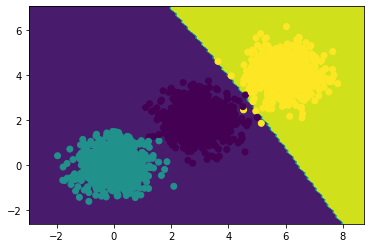

Weights: 
 [[ -2.43153478   3.2499231    1.33926998   2.841445  ]
 [ -1.40269913   1.89488213   0.20898199   2.90149934]
 [  3.77307561 -18.35357949  -4.36129205  -8.67781697]] [[-0.68089045]
 [10.26012252]
 [-2.345505  ]
 [-7.24197675]]

Train Accuracy:  0.3329166666666667


In [0]:
# Concentric circles dataset
#X=generateData(200,'circles',10,'false')  
X=generateData(800,'twoClusters',0,3,'false')
X=np.insert(X,2,1,axis=1)

X,X_=train_test_split(X,100,0)

net_obj = neural_net2(0.1)
w1,w2=net_obj.train(X,3,4,1,'relu',60000)

ret_array1=net_obj.predict(X,w1,w2,3,8,1,'relu',1)
acc1=net_obj.accuracy(ret_array1[:,0],X[:,-1])

# ret_array2=net_obj.predict(X_,w1,w2,3,4,1,'sigmoid',1)
# print(ret_array2.shape)
# acc2=net_obj.accuracy(ret_array2[:,0],X_[:,-1])
plot_decision(X,w1,w2,4,1,'relu')
print("Weights: \n",w1,w2)
print("\nTrain Accuracy: ",acc1)
#print("\nTest Accuracy: ",acc2)

Plotting decision boundaries and accuracy for 2 datasets

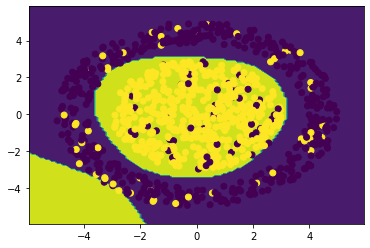

Training Accuracy:  0.899
Activation Function: sigmoid


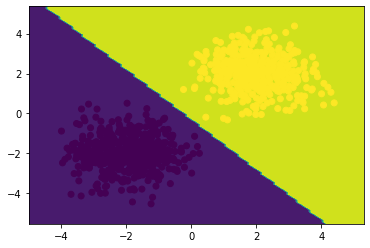

Training Accuracy:  1.0
Activation Function: sigmoid


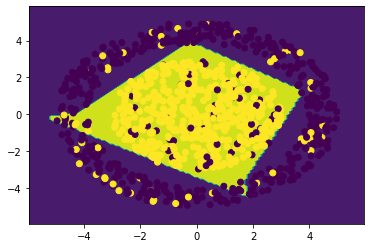

Training Accuracy:  0.886
Activation Function: relu


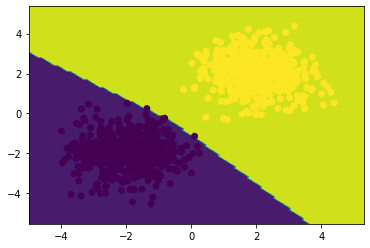

Training Accuracy:  1.0
Activation Function: relu


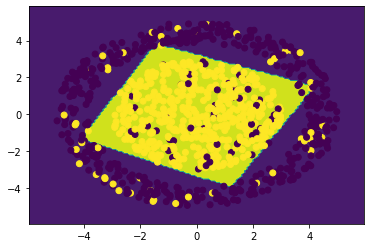

Training Accuracy:  0.9
Activation Function: leaky relu


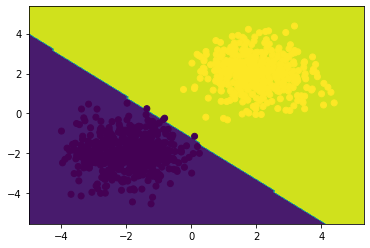

Training Accuracy:  0.996
Activation Function: leaky relu


In [0]:
# 2 datasets
Y=generateData(500,'circles',10,'false')
Z=generateData(500,'twoClusters',10,'false')

for i in ["sigmoid","relu",'leaky relu']:
  for j in [Y,Z]:
    X=np.insert(j,2,1,axis=1)
    net_obj = neural_net(0.5)
    w1,w2=net_obj.train(X,3,4,1,i,50000)
    ret_array=net_obj.predict(X,w1,w2,3,4,1,i,1)
    plot_decision(X,w1,w2,4,1,i)
    acc=net_obj.accuracy(ret_array[:,0],X[:,-1])
    print("Training Accuracy: ",acc)
    print("Activation Function:", i)

Leaky relu works better than relu. relu doesnt work when n is large, relu works at that point.
<br>Sigmoid gives better accuracy for these 2 datasets than relu.

Creating one hot vector of d2_data

In [0]:
a1=np.where(d2_data[:,2]==0,1,0)
a1=np.resize(a1,(1000,1))
a2=np.where(d2_data[:,2]==1,1,0)
a2=np.resize(a2,(1000,1))
hot_vector=np.append(d2_data[:,:2],a1,axis=1)
hot_vector=np.append(hot_vector,a2,axis=1)
print(hot_vector.shape)
print(a1.shape)
print(a2.shape)

(1000, 4)
(1000, 1)
(1000, 1)


In [0]:
np.random.shuffle(hot_vector)

11 lines of code above

In [0]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
X=generateData(5000,'circles',0,'false')

#t = np.array([[0,1,1,0]]).T
t = X[:,-1]
t=np.reshape(t,(X.shape[0],1))
W1 = 2*np.random.random((2,4)) - 1
W2 = 2*np.random.random((4,1)) - 1
for j in range(6000):
  h = 1/(1+np.exp(-(np.dot(X[:,:-1],W1))))
  #print(h.shape)
  y = 1/(1+np.exp(-(np.dot(h,W2))))
  #print(y.shape)
  y_delta = (t - y)*(y*(1-y))
  #print(y_delta.shape)
  h_delta = np.dot(y_delta, W2.T) * (h * (1-h))
  #print(h_delta.shape)
  W2 += np.dot(h.T, y_delta)
  #print(h_delta.shape)  
  #print(W1.shape)
  #print(X.shape)
  W1 += np.dot(X[:,:-1].T, h_delta)
plot_decision(X,W1,W2,4,1,'sigmoid')

KeyboardInterrupt: ignored